For the given data in Excel file
* Use package to identify the principal components and plot
the 2D PCA figure (remember to mark the label of
samples and the percentage of the total variance explained
by each principal component).
* Use both SVD and eigendecomposition to identify the
principal components and plot the 2D PCA figures,
respectively.
* Check if the figures obtained in (a) and (b) are exactly the
same. If not, please explain why.
* Since the PCA figure in (a) showed that the two groups
can be separated by PC1, please identify the ten most
important features for classification.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

data = pd.read_excel("data/20231211 HwData.xlsx", sheet_name="DataMatrix", index_col=0)
label = pd.read_excel("data/20231211 HwData.xlsx", sheet_name="Label", index_col=0)

Text(0, 0.5, 'pc2(17.50%)')

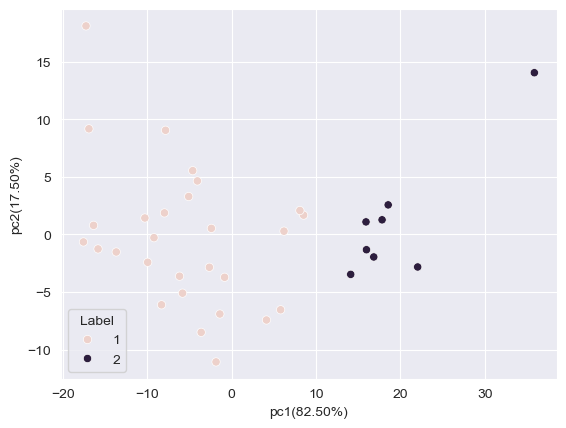

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
sk_learn_result_df = pd.DataFrame(pca.fit_transform(data), 
                         columns=["pc1", "pc2"], 
                         index=data.index)

sk_learn_result_df = pd.concat((sk_learn_result_df, label), axis=1)
explained_variance_ratio = pca.explained_variance_/pca.explained_variance_.sum()
sns.scatterplot(sk_learn_result_df, x="pc1", y="pc2", hue="Label")
plt.xlabel(f"pc1({explained_variance_ratio[0]*100:.2f}%)")
plt.ylabel(f"pc2({explained_variance_ratio[1]*100:.2f}%)")

Text(0, 0.5, 'pc2(17.50%)')

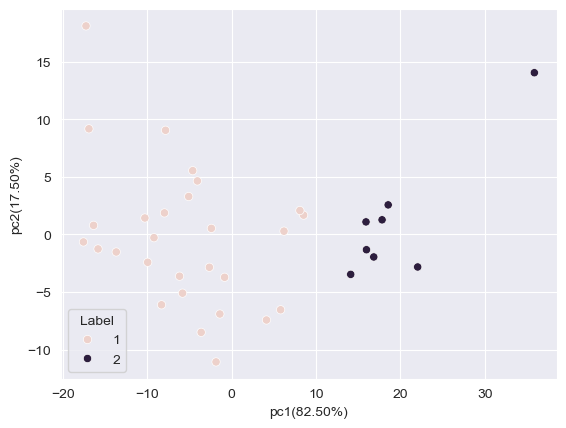

In [74]:
# eigen values
X = data
Z = X - X.mean()
A = Z.T@Z
eigenvalues, eigenvectors = np.linalg.eig(A)
T_eig = Z@eigenvectors
T_eig = np.real(T_eig)
eigen_varience = np.real(eigenvalues)[:2]/np.real(eigenvalues)[:2].sum()
eigen_result_df = pd.DataFrame(T_eig[:, 0:2], 
                         columns=["pc1", "pc2"], 
                         index=data.index)
eigen_result_df = pd.concat((eigen_result_df, label), axis=1)
sns.scatterplot(eigen_result_df, x="pc1", y="pc2", hue="Label")
plt.xlabel(f"pc1({eigen_varience[0]*100:.2f}%)")
plt.ylabel(f"pc2({eigen_varience[1]*100:.2f}%)")

Text(0, 0.5, 'pc2(17.50%)')

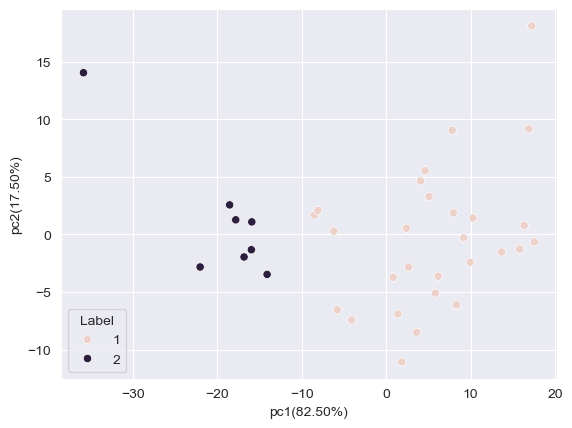

In [77]:
U, SIGMA, VT = np.linalg.svd(Z)
T_SVD = Z@VT.T
T_SVD = np.real(T_SVD)
SVD_result_df = pd.DataFrame(T_SVD[:, 0:2], 
                         columns=["pc1", "pc2"], 
                         index=data.index)
SVD_result_df = pd.concat((SVD_result_df, label), axis=1)
SVD_variance = (SIGMA**2)[:2]/(SIGMA**2)[:2].sum()
sns.scatterplot(SVD_result_df, x="pc1", y="pc2", hue="Label")

# SVD 圖形會是相反的,因此下一步我們反轉x軸後再繪製
SVD_result_df.iloc[:, 0] = -SVD_result_df.iloc[:, 0]
plt.xlabel(f"pc1({SVD_variance[0]*100:.2f}%)")
plt.ylabel(f"pc2({SVD_variance[1]*100:.2f}%)")

In [78]:
# 確認結果是否相同
print(np.allclose(T_eig, T_SVD)) # 未反轉PC1 
print(np.allclose(eigen_result_df, SVD_result_df)) # 反轉PC1

False
True


PCA中可能會有為負值而導致方向相反的問題, 可以透過乘上負號調整呈現。

<Axes: xlabel='pc1', ylabel='pc2'>

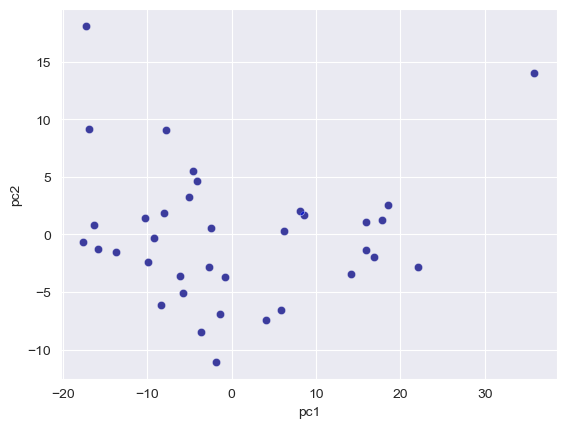

In [79]:
# 繪製三個圖形並疊圖，可以看出是完全重疊的
sns.scatterplot(eigen_result_df, x="pc1", y="pc2", c="r", alpha=0.5)
sns.scatterplot(SVD_result_df, x="pc1", y="pc2", c="g", alpha=0.5)
sns.scatterplot(sk_learn_result_df, x="pc1", y="pc2", c="b", alpha=0.5)

In [80]:
# d 影響最大的10個features  
components_df = pd.DataFrame(pca.components_[0, :], 
                             index=data.columns, 
                             columns=["component"])
components_df.abs().sort_values("component", ascending=False).head(10)

,component
931,0.272579
973,0.258691
930,0.240822
79368,0.236412
3514,0.231468
1380,0.228244
5079,0.225865
55024,0.177623
29851,0.166087
50852,0.151170
